<center>
    
    Boolean Backpropagation
    
    Author: Daniel Coble
    
    Status: Work in Progress
</center>

I show a method of developing a boolean logic model and training it with a backpropagation method. I apply this method to the MNIST dataset.

In [121]:
# load mnist
import numpy as np
import sklearn as sk
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib as mpl

mnist = sk.datasets.fetch_openml('mnist_784', as_frame=False, parser='liac-arff')

data=mnist['data']
target = np.asarray(mnist['target'],dtype=int)

# use 1/10 of data
data = data[::10,:]
target = target[::10]


target_ = np.zeros((data.shape[0], 10), dtype=bool)
for i, d in enumerate(target):
    target_[i,d] = True
target = target_

data_train, data_test, target_train, target_test = sk.model_selection.\
    train_test_split(data, target, test_size=0.2)

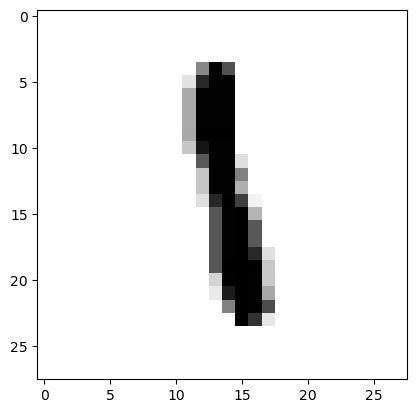

In [102]:
# plot a digit

digit_id = np.random.randint(0, high=data.shape[0])
test_digit = data[digit_id,:]
digit_reshaped = np.reshape(test_digit,(28,28))

plt.figure()
plt.imshow(digit_reshaped, cmap=mpl.cm.binary, interpolation='nearest')
plt.show()

In [147]:
nodes_layer1 = 10240
nodes_layer2 = 2560
nodes_layer3 = 640
nodes_layer4 = 160
nodes_layer5 = 40
nodes_layer6 = 10

nodes_per_layer = [nodes_layer1, nodes_layer2, nodes_layer3, nodes_layer4, nodes_layer5, nodes_layer6]

# weights of each layer
w_layer = [np.random.rand(nodes) > .5 for nodes in nodes_per_layer]
w_reverse = reversed(w_layer)
# connections of each node
prev_nodes = [784] + nodes_per_layer[:-1]
c_layer = [np.random.randint(0, high=prev, size=(3, nodes)) for prev, nodes in zip(prev_nodes, nodes_per_layer)]
c_reverse = reversed(c_layer)
# negations of each node
n_layer = [np.random.rand(nodes, 3) > .5 for nodes in nodes_per_layer]
n_reverse = reversed(n_layer)

layer_1_threshold = np.random.rand(nodes_layer1, 3)

stop_training = False
history = {
    'error': [],
    'n_nodes_improve': [],
    'expected_next_error': [],
}
epoch = 0
N = data_train.shape[0]
# begin training
while(not stop_training):
    # forward inference
    x = data_train.T
    for i, (w, c, n) in enumerate(zip(w_layer, c_layer, n_layer)):
        z_forward = []
        y_forward = []
        if(i == 0):
            # https://numpy.org/doc/stable/user/basics.indexing.html
            z = x[c].T > layer_1_threshold
            z = np.logical_xor(z, n)
            y = np.any(z, axis=2)
            x = w*x
            x = x.T
            z_forward.append(z)
            y_forward.append(y)
        else:
            z = x[c].T
            x = np.any(z, axis=2)
            x = w*x
            x = x.T
            z_forward.append(z)
    
    # calculate error
    e = x != (target_train.T)
    E = 1/N * np.sum(e)
    print(E)
    
    # dx: increase in error if value is flipped
    dx = (1/(10*N))*e + (-1/(10*N))*(np.logical_not(e))
    # backpropagation
    z_reverse = reversed(z_forward)
    y_reverse = reversed(y_forward)
    for i, (w, c, n, z) in enumerate(zip(w_reverse, c_reverse, n_reverse, z_reverse, y_reverse)):
        du = dx
        dw = np.sum(du*y, axis=1)
        print(c.shape)
        dx = np.zeros(c.shape)
    
    
    stop_training = True
        
        

4.198214285714286


In [140]:
w = w_layer[0]
c = c_layer[0]
n = n_layer[0]

x = data_train.T
z = x[c].T > layer_1_threshold
z = np.logical_xor(z, n)
x = np.any(z, axis=2)
x = w*x
z_forward.append(z)

ValueError: operands could not be broadcast together with shapes (5600,10,3) (10240,3) 

In [148]:
de.shape

(10, 5600)

In [130]:
data_train.T.shape

(784, 5600)

Some things to note:
1. It's possible to reduce the compute cost during training by only processing the propagation after the changed value.
2. An inferring model will be smaller after all weights=0 are eliminated.